# Spheres from weights

[NiftiSpheresMasker documentation](https://nilearn.github.io/stable/modules/generated/nilearn.maskers.NiftiSpheresMasker.html)

In [1]:
import os
import pandas as pd
import numpy as np
from nilearn.maskers import NiftiSpheresMasker
from nilearn.image import math_img
from nilearn.glm import threshold_stats_img

In [2]:
# Settings
data_dir = "/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/"
out_dir_group = os.path.join(data_dir, "derivatives", "nilearn_glm", "group")

# Threshold values
hc = "fpr"  # None, 'bonferroni', 'fdr'
ct = 20  # cluster threshold
alpha = 0.001  # p-value threshold

emotion_names = [
    "JoyfulActivation",
    "Nostalgia",
    "Peacefulness",
    "Power",
    "Sadness",
    "Tenderness",
    "Tension",
    "Transcendence",
    "Wonder",
]

factors_names = [
    "Sublimity",
    "Vitality",
    "Unease",
]

In [3]:
# Clusters
cluster_file_path = "out_atlasreader/atlas_ALL_peaks.csv"

df = pd.read_csv(cluster_file_path)

# Extract the coordinates
coords = df[["peak_x", "peak_y", "peak_z"]].values
coords

array([[-56.5, -16.5,   3.5],
       [ 57.5, -10.5,   3.5],
       [-10.5,  -6.5,  65.5],
       [ 55.5,  -4.5,  43.5],
       [-18.5, -66.5,  47.5],
       [ 39.5,  59.5,  -8.5],
       [ 33.5, -66.5,  47.5],
       [-48.5,  13.5,  27.5],
       [-18.5,  63.5,  17.5],
       [-64.5, -56.5,  -6.5],
       [-50.5,  27.5,  -8.5],
       [ 37.5,  45.5,  33.5],
       [ 11.5, -64.5,  33.5],
       [ 57.5, -60.5,  -4.5],
       [ 55.5,  33.5,   3.5],
       [ 65.5, -52.5,   9.5],
       [ 59.5, -42.5,  45.5],
       [-24.5,  -4.5, -18.5],
       [ 63.5, -28.5, -18.5],
       [  3.5, -36.5,  45.5],
       [ 43.5, -64.5, -32.5],
       [  5.5, -22.5,  43.5],
       [-56.5,  19.5,  13.5],
       [  7.5, -76.5,  55.5],
       [ -8.5,  49.5,  -6.5],
       [-40.5,  55.5, -12.5],
       [ 25.5,  61.5,  17.5]])

In [ ]:
# Define Masker
masker = NiftiSpheresMasker(
    coords,
    radius=4,
    detrend=False,
    standardize=False,
)

In [5]:
# Initalize array to store the z-scores (size = number of emotions x number of clusters)
z_scores = np.zeros((len(emotion_names), len(coords)))

# Iterate over the nine emotions
for idx, emotion_name in enumerate(emotion_names):
    z_map = os.path.join(out_dir_group, f"group_task-02a_stat-z_con-{emotion_name}.nii.gz")
    z_map_pos = math_img("np.maximum(img, 0)", img=z_map)

    # Apply masker.fit_transform(z_map_pos)
    z_scores[idx, :] = masker.fit_transform(z_map_pos)


[NiftiSpheresMasker.wrapped] Loading data from Nifti1Image(
shape=(97, 115, 97),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiSpheresMasker.wrapped] Extracting region signals
[NiftiSpheresMasker.wrapped] Cleaning extracted signals
[NiftiSpheresMasker.wrapped] Loading data from Nifti1Image(
shape=(97, 115, 97),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiSpheresMasker.wrapped] Extracting region signals
[NiftiSpheresMasker.wrapped] Cleaning extracted signals
[NiftiSpheresMasker.wrapped] Loading data from Nifti1Image(
shape=(97, 115, 97),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiSpheres

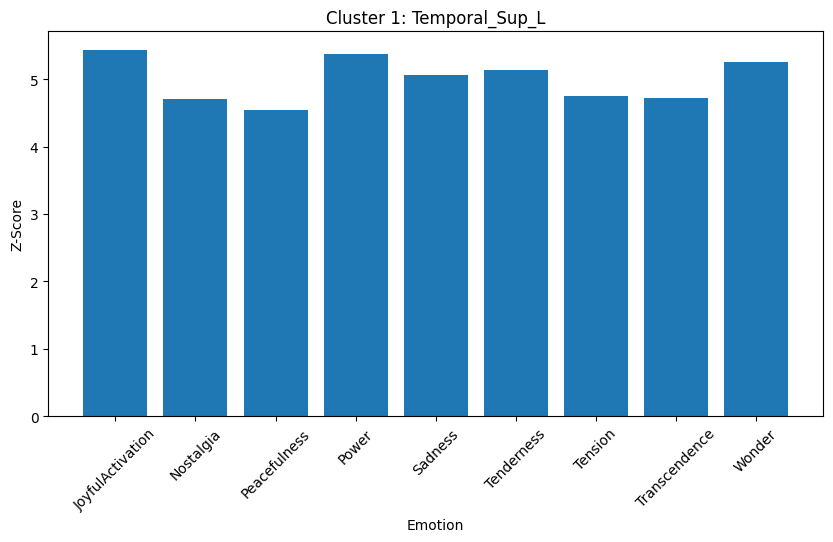

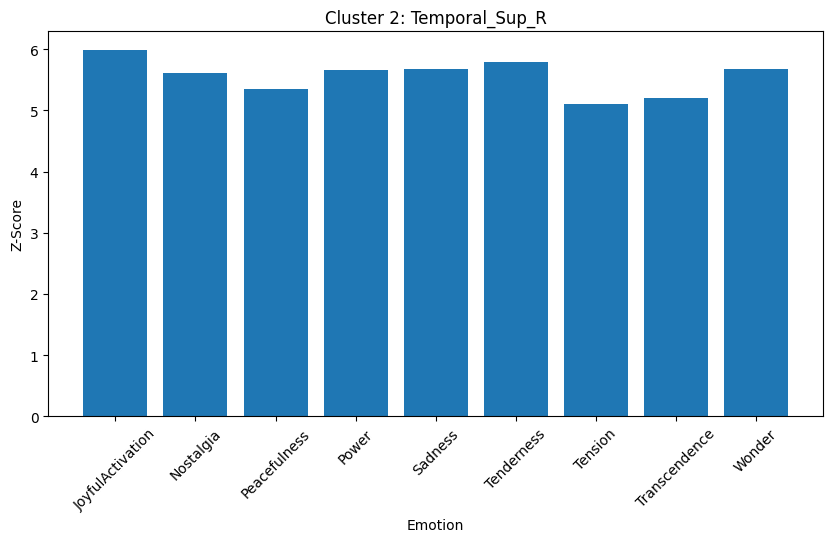

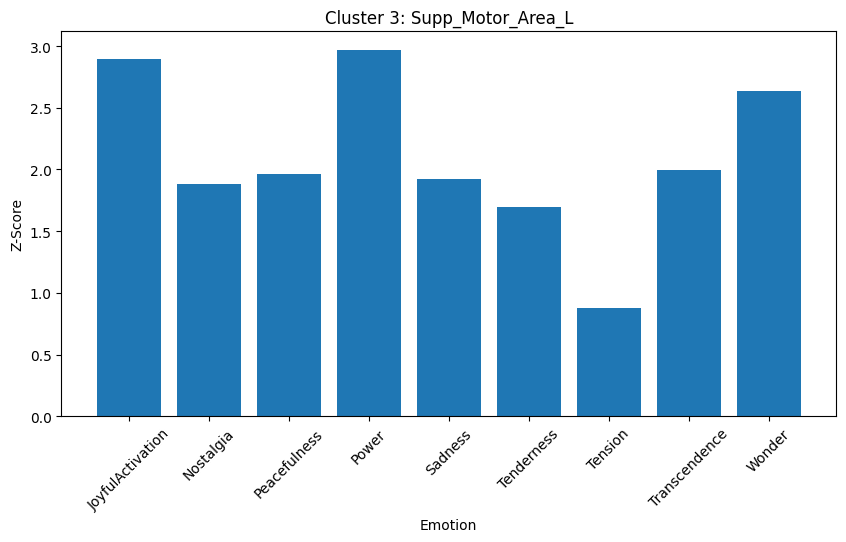

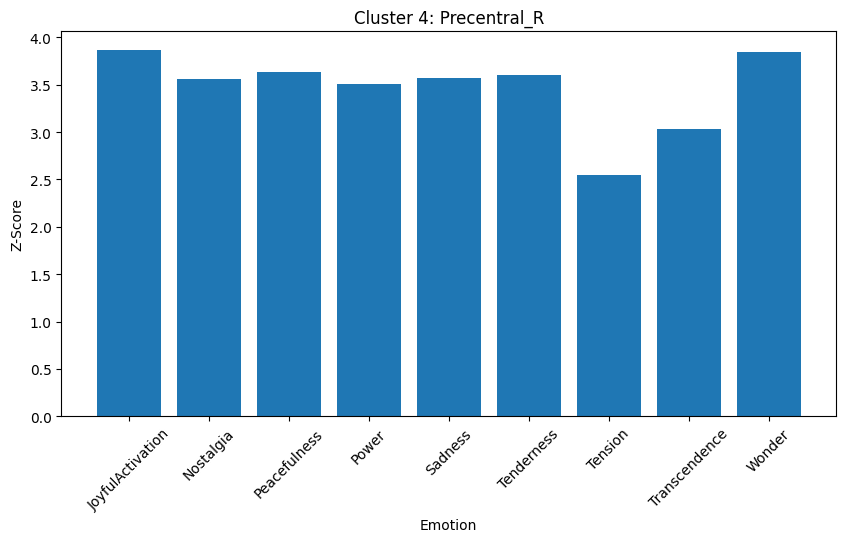

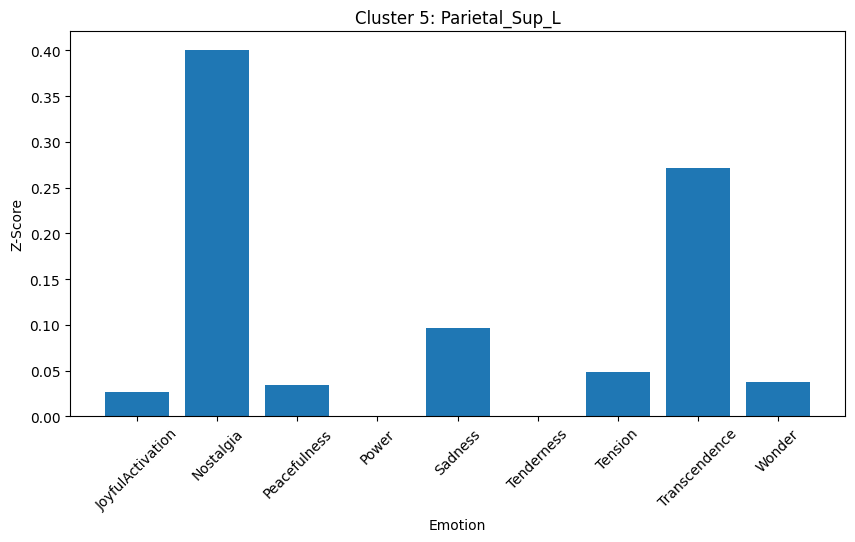

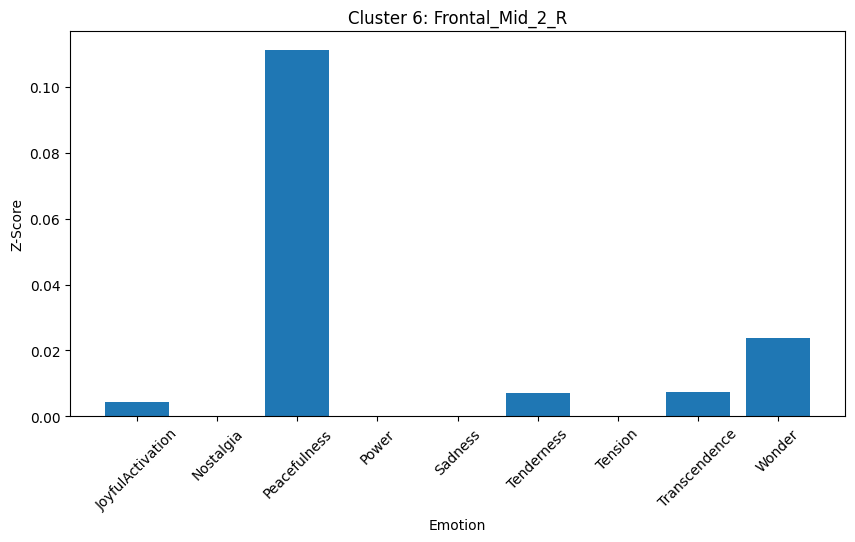

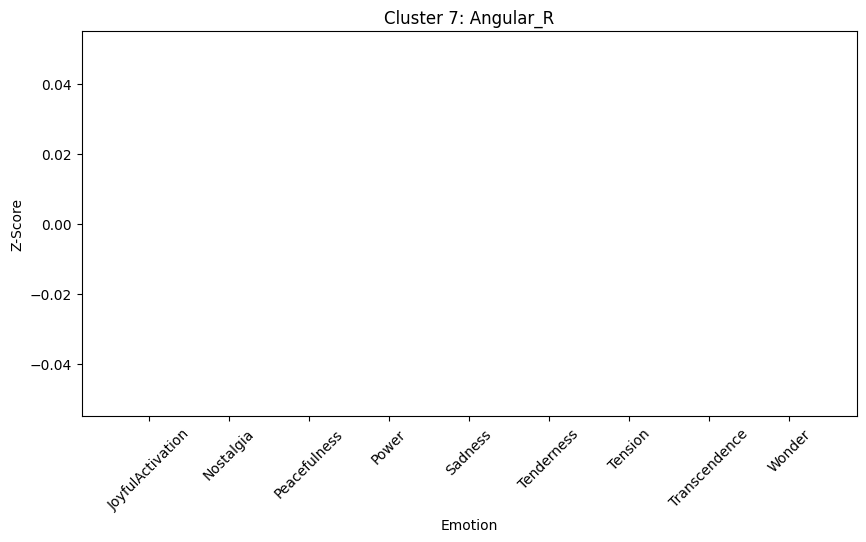

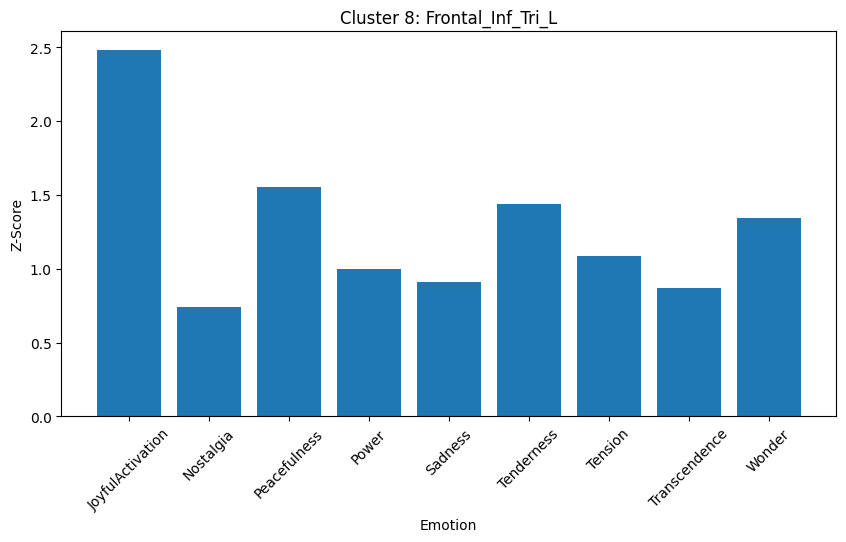

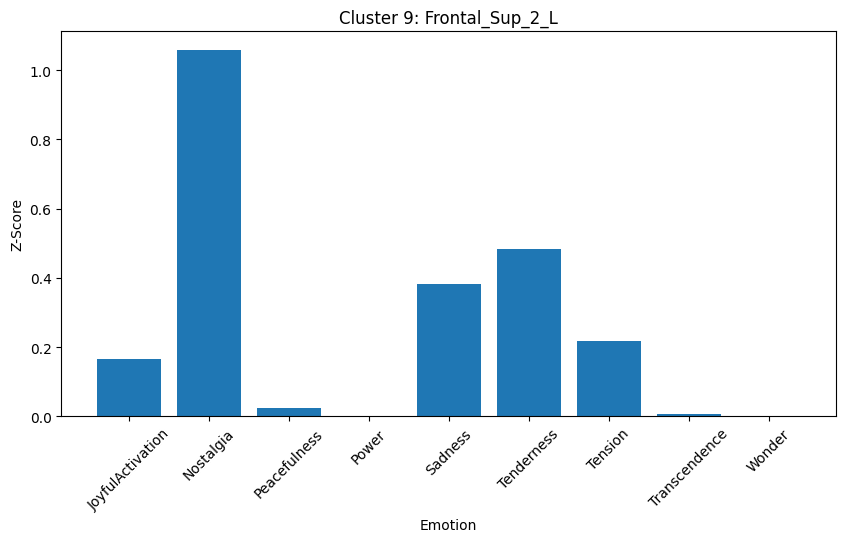

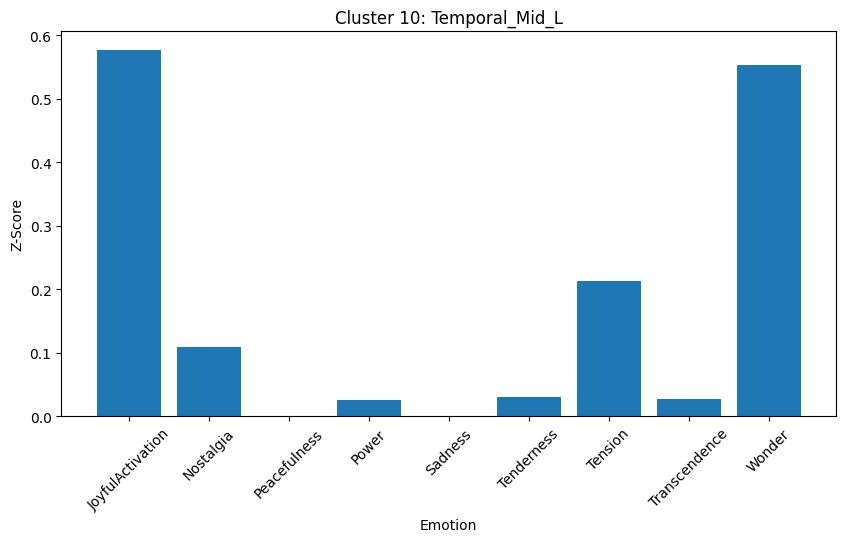

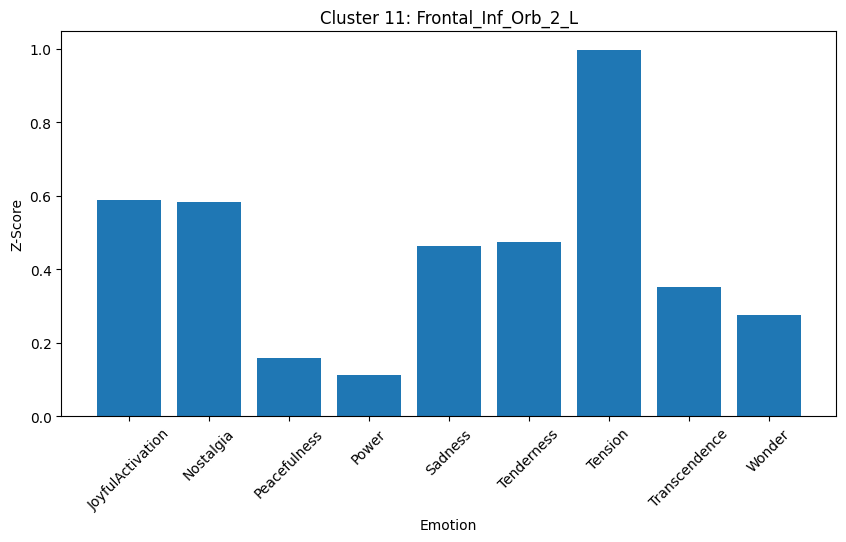

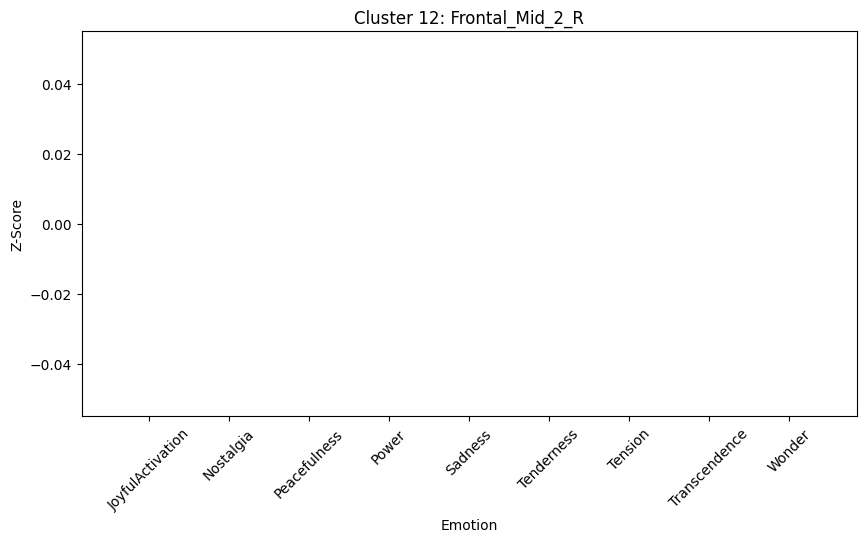

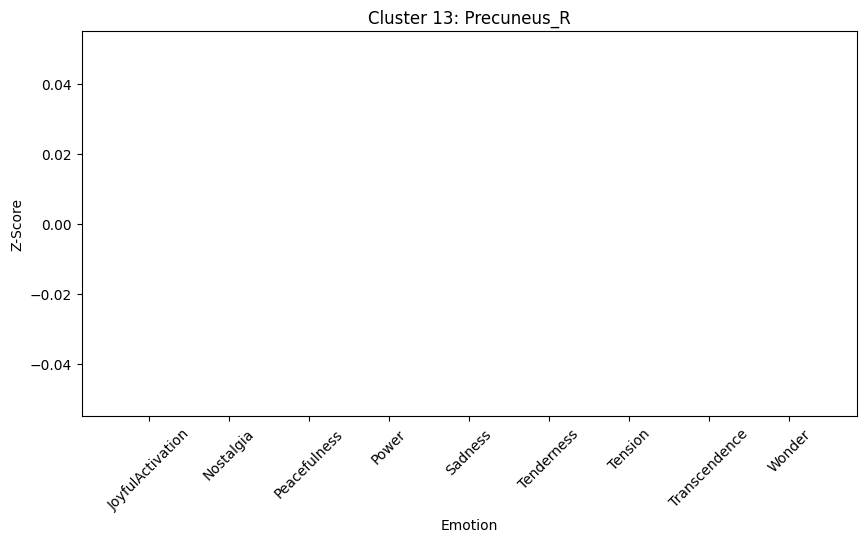

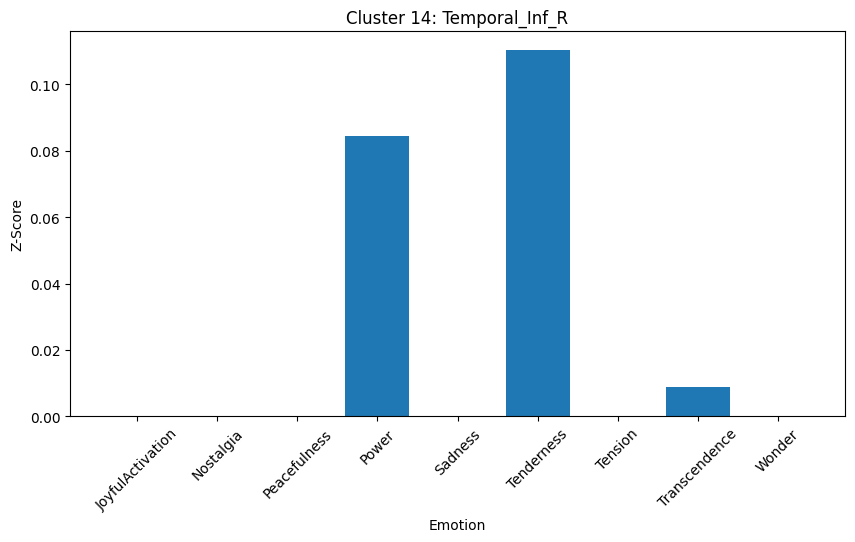

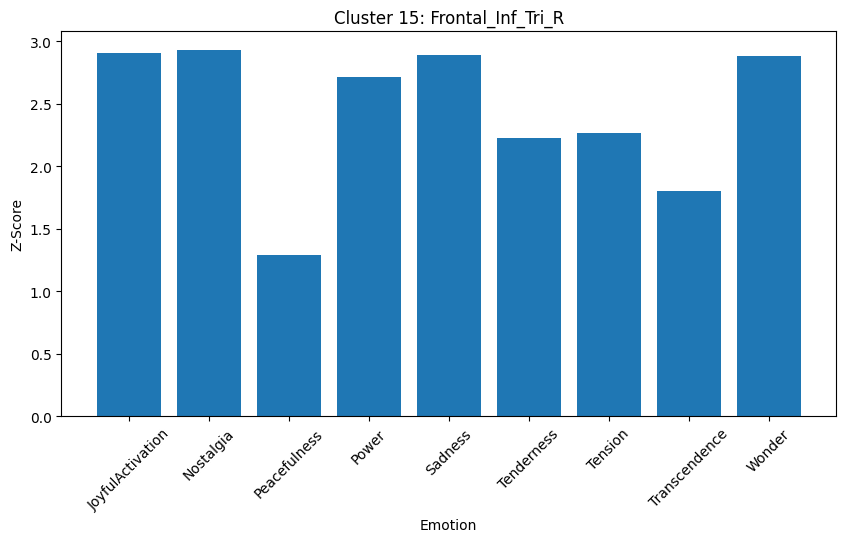

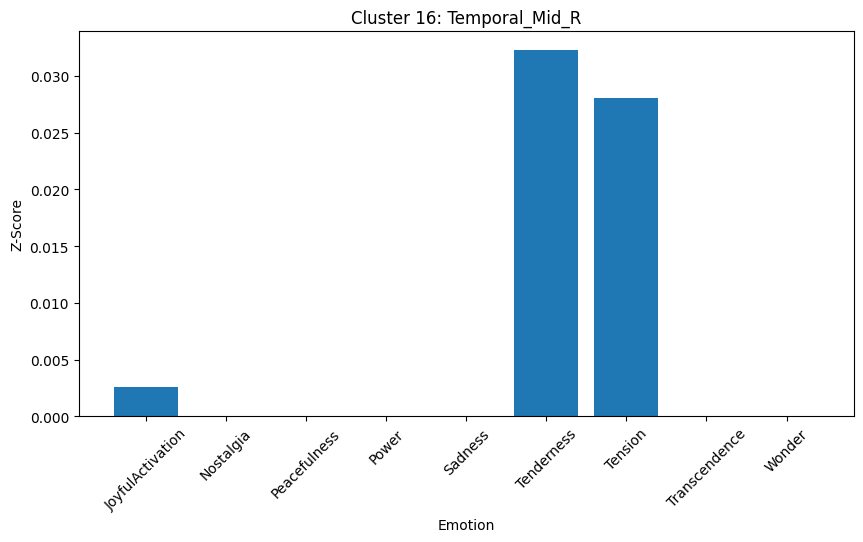

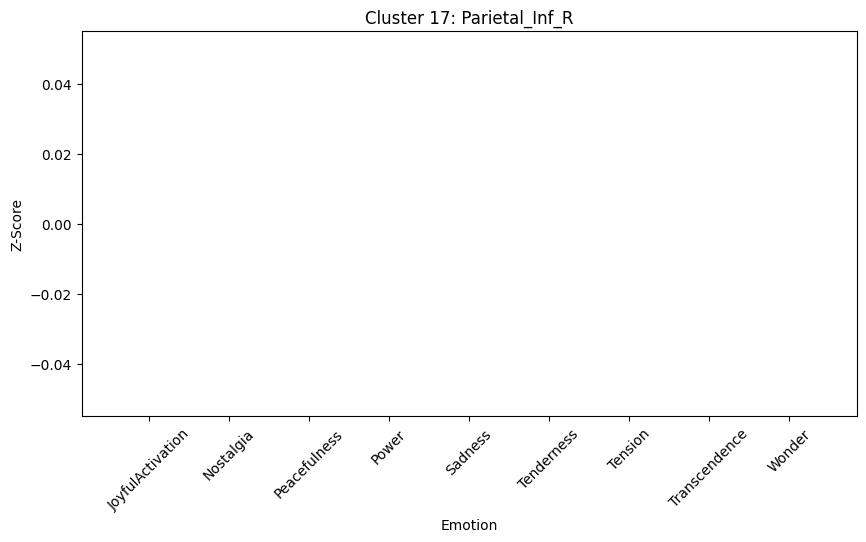

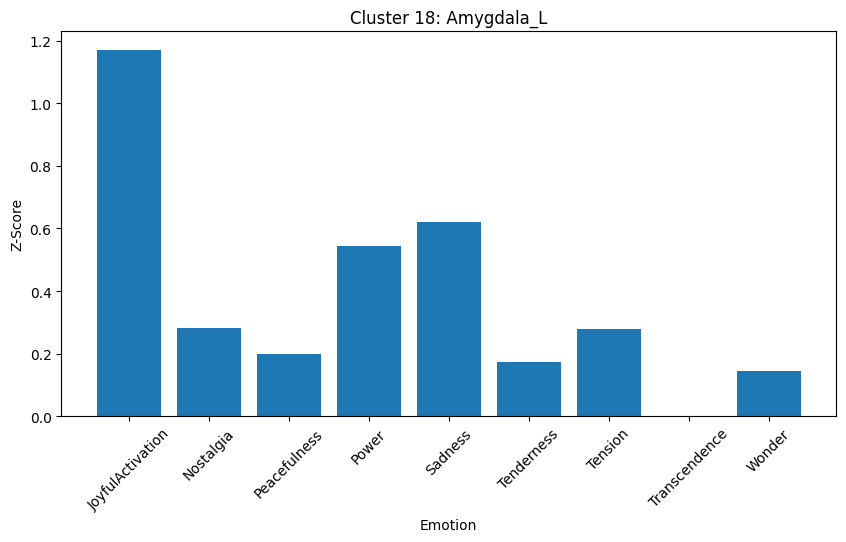

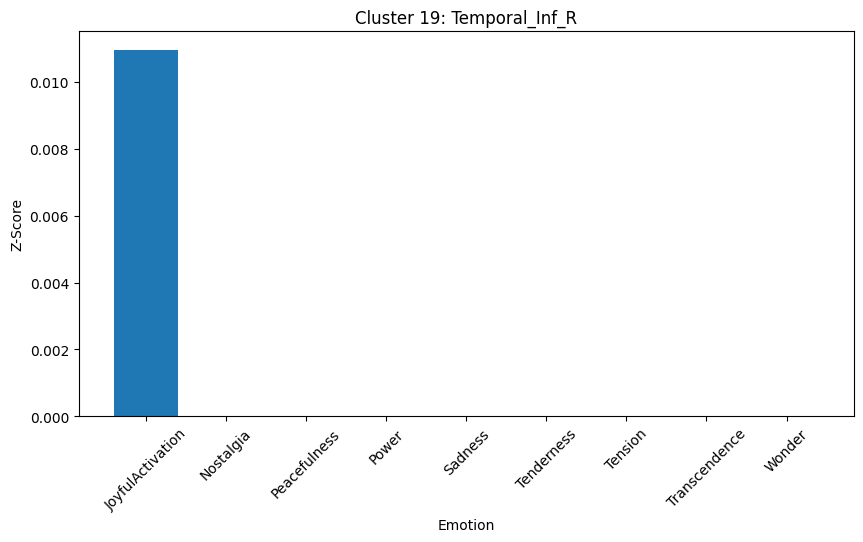

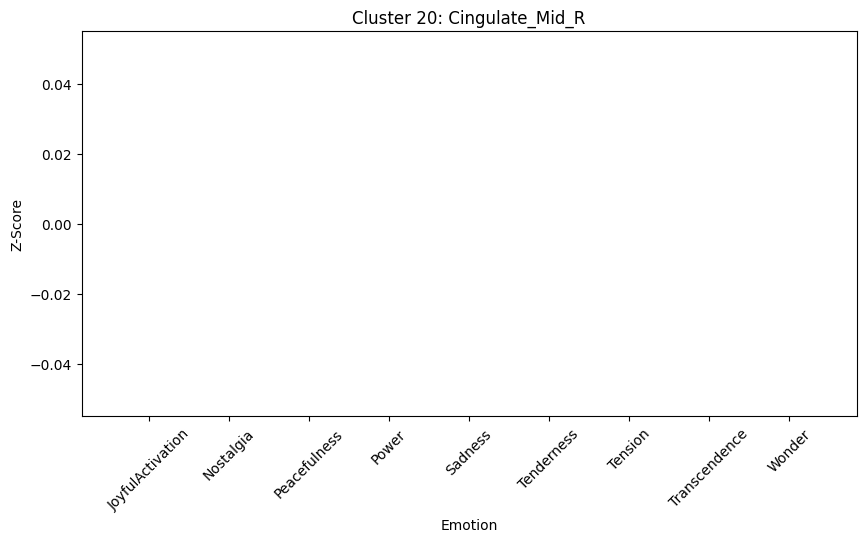

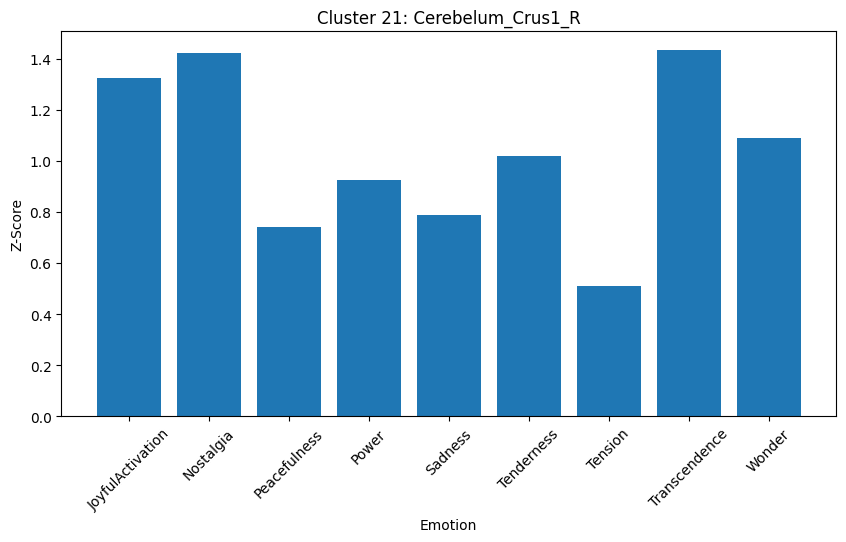

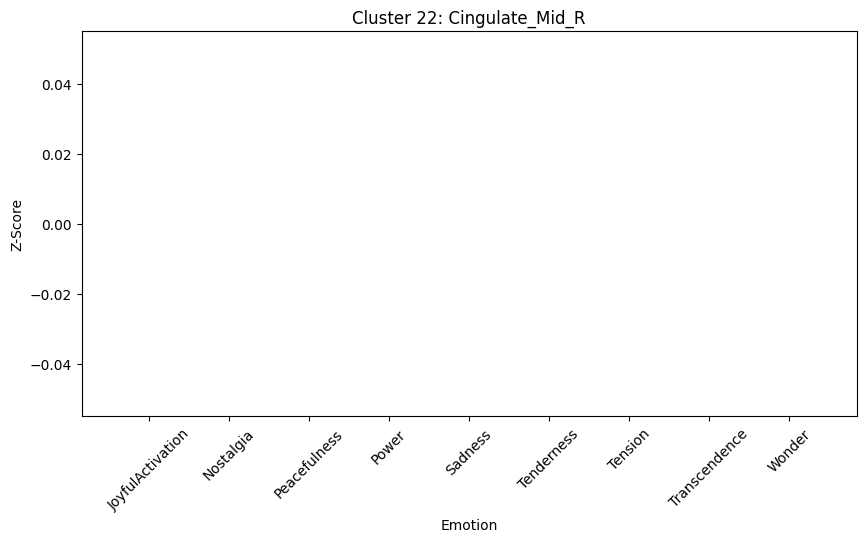

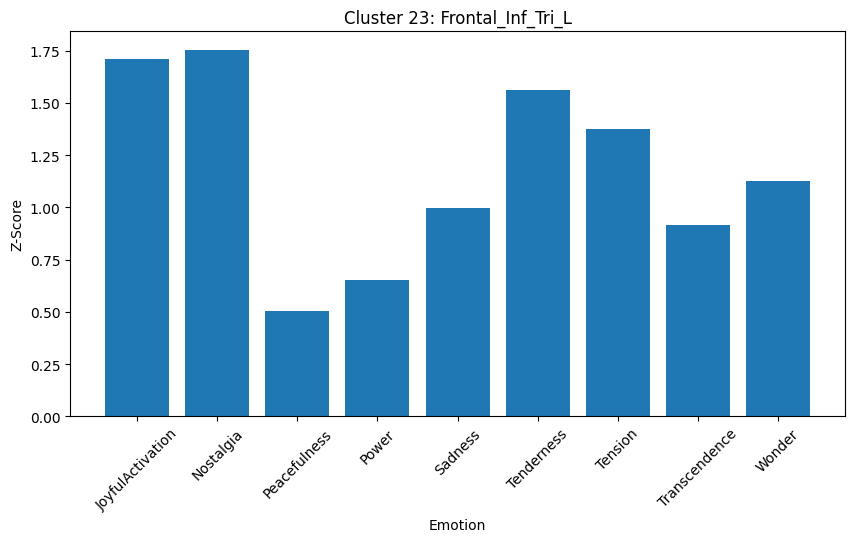

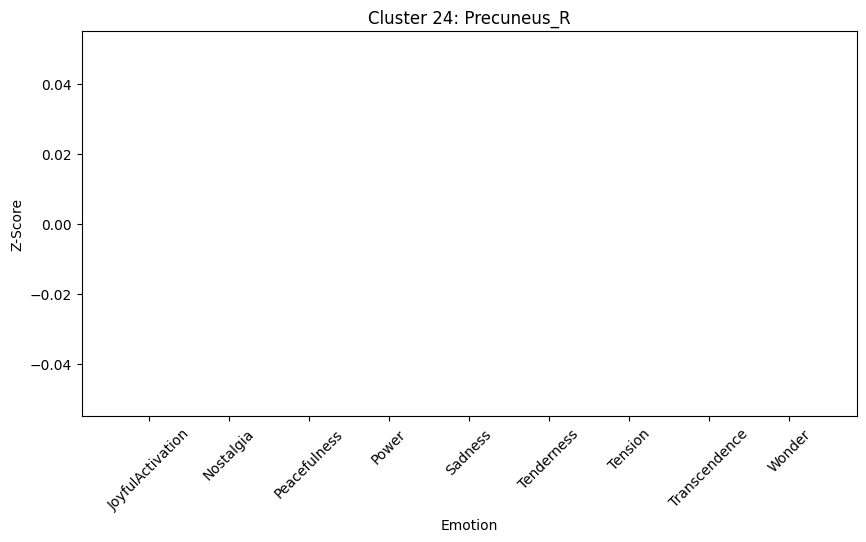

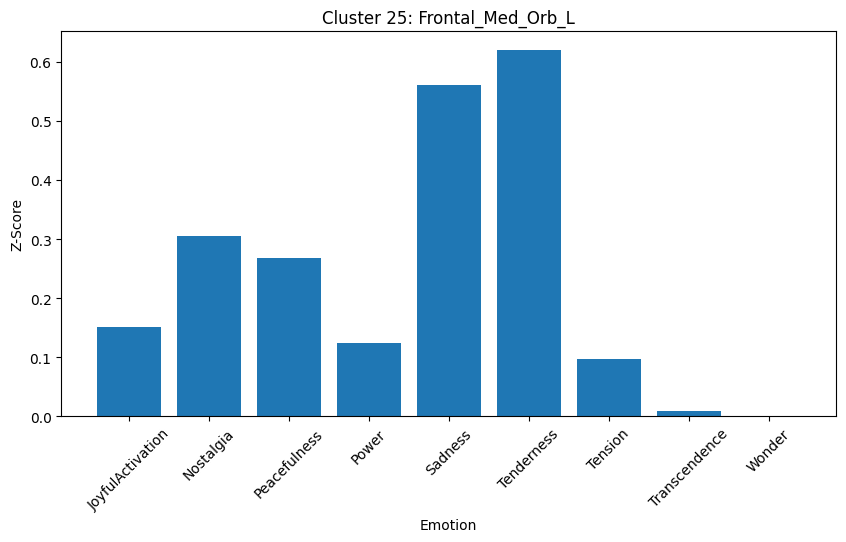

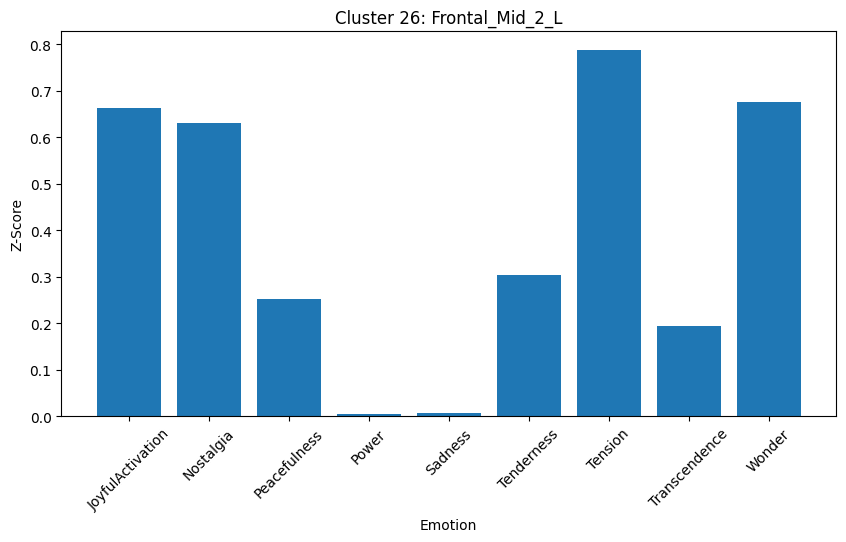

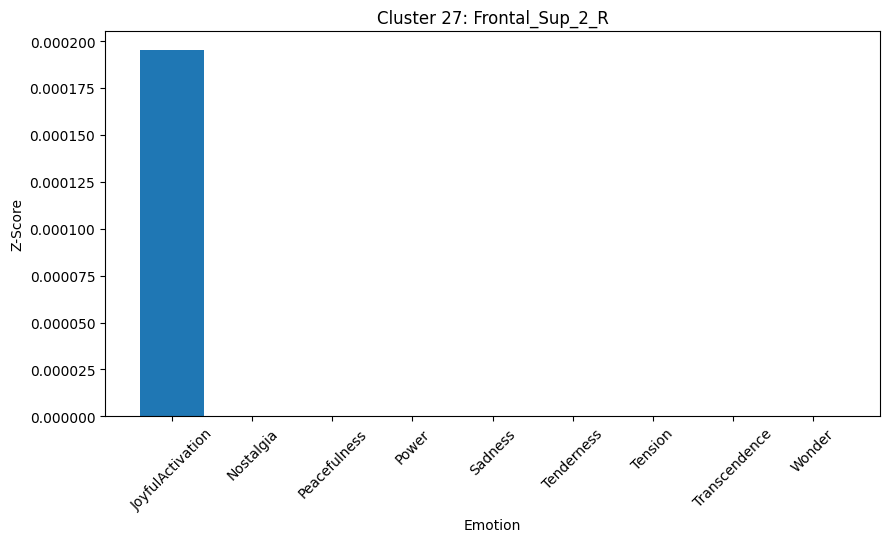

In [11]:
# Plot z-scores for all clusters
import matplotlib.pyplot as plt

for cluster_idx in range(len(coords)):
    plt.figure(figsize=(10, 5))
    plt.bar(emotion_names, z_scores[:, cluster_idx])
    plt.title(f"Cluster {cluster_idx + 1}: {df.iloc[cluster_idx]['aal']}")
    plt.ylabel("Z-Score")
    plt.xlabel("Emotion")
    plt.xticks(rotation=45)
    plt.show()

In [54]:
# Get the z-score maps for the nine emotions

c_idx = 0

z_map_g = os.path.join(out_dir_group, f"group_task-02a_stat-z_con-{emotion_names[c_idx]}.nii.gz")

# clean_map_g, threshold_g = threshold_stats_img(z_map_g, alpha=alpha, height_control=hc, cluster_threshold=ct)

# print(f"Threshold: {threshold_g}")

# threshold clean_map_g to only show positive values
clean_map_g = math_img("np.maximum(img, 0)", img=z_map_g)

# get a binary mask based on clean_map_g
mask_g = math_img("img > 0", img=clean_map_g)

In [56]:
# apply masker to clean_map_g
z_scores = masker.fit_transform(clean_map_g)

[NiftiSpheresMasker.wrapped] Loading data from Nifti1Image(
shape=(97, 115, 97),
affine=array([[   2. ,    0. ,    0. ,  -96.5],
       [   0. ,    2. ,    0. , -132.5],
       [   0. ,    0. ,    2. ,  -78.5],
       [   0. ,    0. ,    0. ,    1. ]])
)
[NiftiSpheresMasker.wrapped] Extracting region signals
[NiftiSpheresMasker.wrapped] Cleaning extracted signals


<BarContainer object of 27 artists>

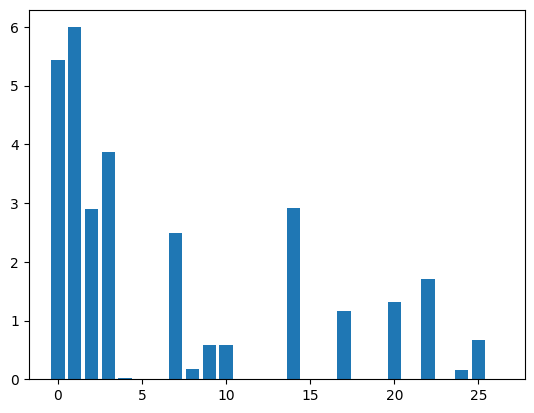

In [58]:
# plot the z-scores in bar plot
import matplotlib.pyplot as plt

plt.bar(range(len(z_scores[0])), z_scores[0])